Model in this notebook is used in loan risk prediction project on my GitHub
which can be found [here](https://github.com/oliszymanski/loan-risk-prediction/)

### libraries and global variables

In [35]:
import pandas as pd         # dataset calcualtions
import numpy as np

import seaborn as sns       # data visualization (in EDA and buidling model)
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier


credit_features = pd.read_csv( './../dataset/credit_features_subset.csv' )
loan_applications = pd.read_csv( './../dataset/loan_applications.csv' )
loan_applications['ApplicationDate'] = pd.to_datetime(loan_applications['ApplicationDate'], dayfirst=True)

merged_data = pd.merge( credit_features, loan_applications, on='UID', how='left' )
merged_data = merged_data.drop('UID', axis=1)

In [36]:
print(merged_data.dtypes[merged_data.columns[0]])

int64


### Exploratory data analysis

In [37]:
print(f'merged_data.dtypes:\n{merged_data.dtypes}')

merged_data.dtypes:
ALL_AgeOfOldestAccount                           int64
ALL_AgeOfYoungestAccount                         int64
ALL_Count                                        int64
ALL_CountActive                                  int64
ALL_CountClosedLast12Months                      int64
ALL_CountDefaultAccounts                         int64
ALL_CountOpenedLast12Months                      int64
ALL_CountSettled                                 int64
ALL_MeanAccountAge                             float64
ALL_SumCurrentOutstandingBal                     int64
ALL_SumCurrentOutstandingBalExcMtg               int64
ALL_TimeSinceMostRecentDefault                   int64
ALL_WorstPaymentStatusActiveAccounts             int64
ApplicationDate                         datetime64[ns]
Amount                                           int64
Term                                             int64
EmploymentType                                  object
LoanPurpose                                  

In [38]:
merged_data.head(20)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ALL_AgeOfOldestAccount                8847 non-null   int64         
 1   ALL_AgeOfYoungestAccount              8847 non-null   int64         
 2   ALL_Count                             8847 non-null   int64         
 3   ALL_CountActive                       8847 non-null   int64         
 4   ALL_CountClosedLast12Months           8847 non-null   int64         
 5   ALL_CountDefaultAccounts              8847 non-null   int64         
 6   ALL_CountOpenedLast12Months           8847 non-null   int64         
 7   ALL_CountSettled                      8847 non-null   int64         
 8   ALL_MeanAccountAge                    8847 non-null   float64       
 9   ALL_SumCurrentOutstandingBal          8847 non-null   int64         
 10  

In [39]:
print( merged_data.isnull().sum() )
merged_data.describe()

ALL_AgeOfOldestAccount                  0
ALL_AgeOfYoungestAccount                0
ALL_Count                               0
ALL_CountActive                         0
ALL_CountClosedLast12Months             0
ALL_CountDefaultAccounts                0
ALL_CountOpenedLast12Months             0
ALL_CountSettled                        0
ALL_MeanAccountAge                      0
ALL_SumCurrentOutstandingBal            0
ALL_SumCurrentOutstandingBalExcMtg      0
ALL_TimeSinceMostRecentDefault          0
ALL_WorstPaymentStatusActiveAccounts    0
ApplicationDate                         0
Amount                                  0
Term                                    0
EmploymentType                          0
LoanPurpose                             0
Success                                 0
dtype: int64


,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_TimeSinceMostRecentDefault,ALL_WorstPaymentStatusActiveAccounts,ApplicationDate,Amount,Term,Success
count,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8.847000e+03,8847.000000,8847.0,8847.000000,8847,8847.000000,8847.000000,8847.000000
mean,162.694021,8.587431,17.515316,9.258506,1.589691,1.380355,2.453487,8.231491,57.285159,5.416258e+04,12858.636148,-1.0,2.057647,2020-06-21 07:53:58.657171712,7560.692438,41.985080,0.104216
min,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.0,-1.000000,2020-01-01 00:00:00,500.000000,12.000000,0.000000
25%,100.000000,2.000000,9.000000,6.000000,0.000000,0.000000,1.000000,2.000000,38.770000,3.396000e+03,2438.000000,-1.0,0.000000,2020-03-14 00:00:00,3000.000000,24.000000,0.000000
50%,151.000000,5.000000,15.000000,9.000000,1.000000,0.000000,2.000000,5.000000,53.120000,1.267000e+04,8336.000000,-1.0,0.000000,2020-06-16 00:00:00,6500.000000,48.000000,0.000000
75%,212.000000,10.000000,22.000000,12.000000,2.000000,2.000000,3.000000,10.000000,71.530000,6.171250e+04,17990.500000,-1.0,7.000000,2020-09-24 00:00:00,10000.000000,60.000000,0.000000
max,999.000000,258.000000,233.000000,43.000000,60.000000,23.000000,62.000000,215.000000,304.000000,4.004808e+06,581415.000000,-1.0,7.000000,2020-12-31 00:00:00,20000.000000,60.000000,1.000000
std,94.569878,13.081866,13.900171,4.896900,2.611921,2.749450,2.964837,11.419963,29.132180,1.074432e+05,17756.568825,0.0,3.139938,NaN,5309.138911,16.139168,0.305558


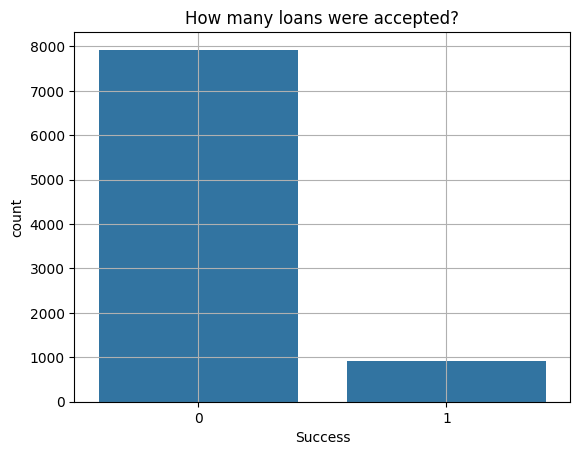

In [40]:
sns.countplot( x='Success', data=merged_data )
plt.title('How many loans were accepted?')
plt.grid()

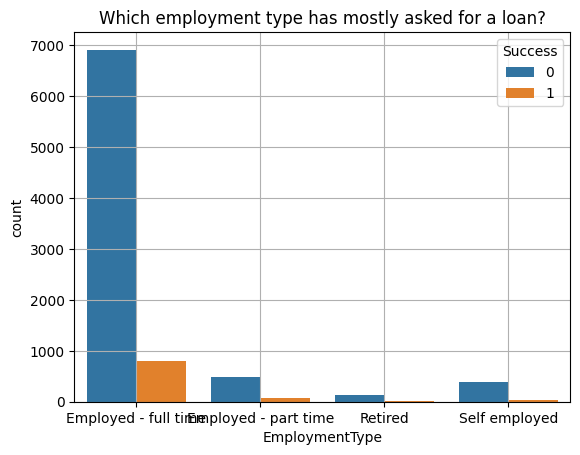

In [41]:
sns.countplot(x='EmploymentType', hue='Success', data=merged_data)
plt.title('Which employment type has mostly asked for a loan?')
plt.grid()

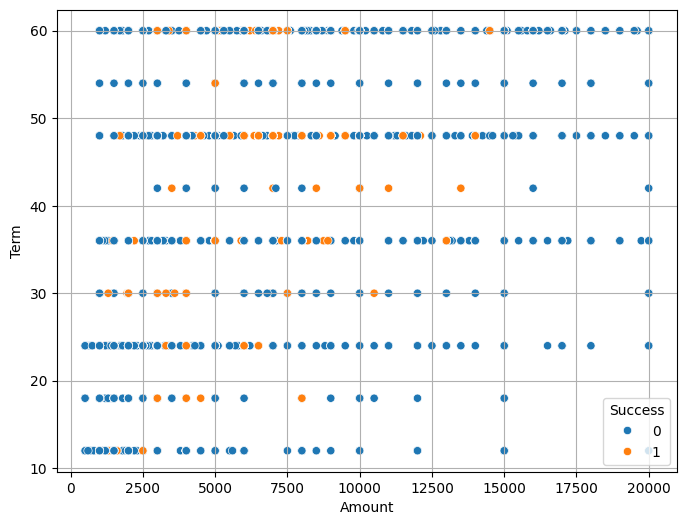

In [42]:
plt.figure( figsize=(8, 6) )
sns.scatterplot( x='Amount', y='Term', data=merged_data, hue='Success' )
plt.grid()

The higher the loan, bigger the risk - thats why there's a higher percentage of
success on lower loan

<Axes: xlabel='Amount', ylabel='Count'>

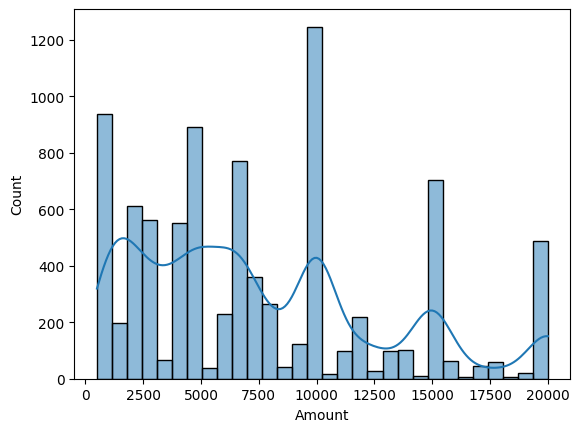

In [43]:
sns.histplot( x='Amount', data=merged_data, bins=30, kde=True )

Applicants request about $10.000 loans mostly.

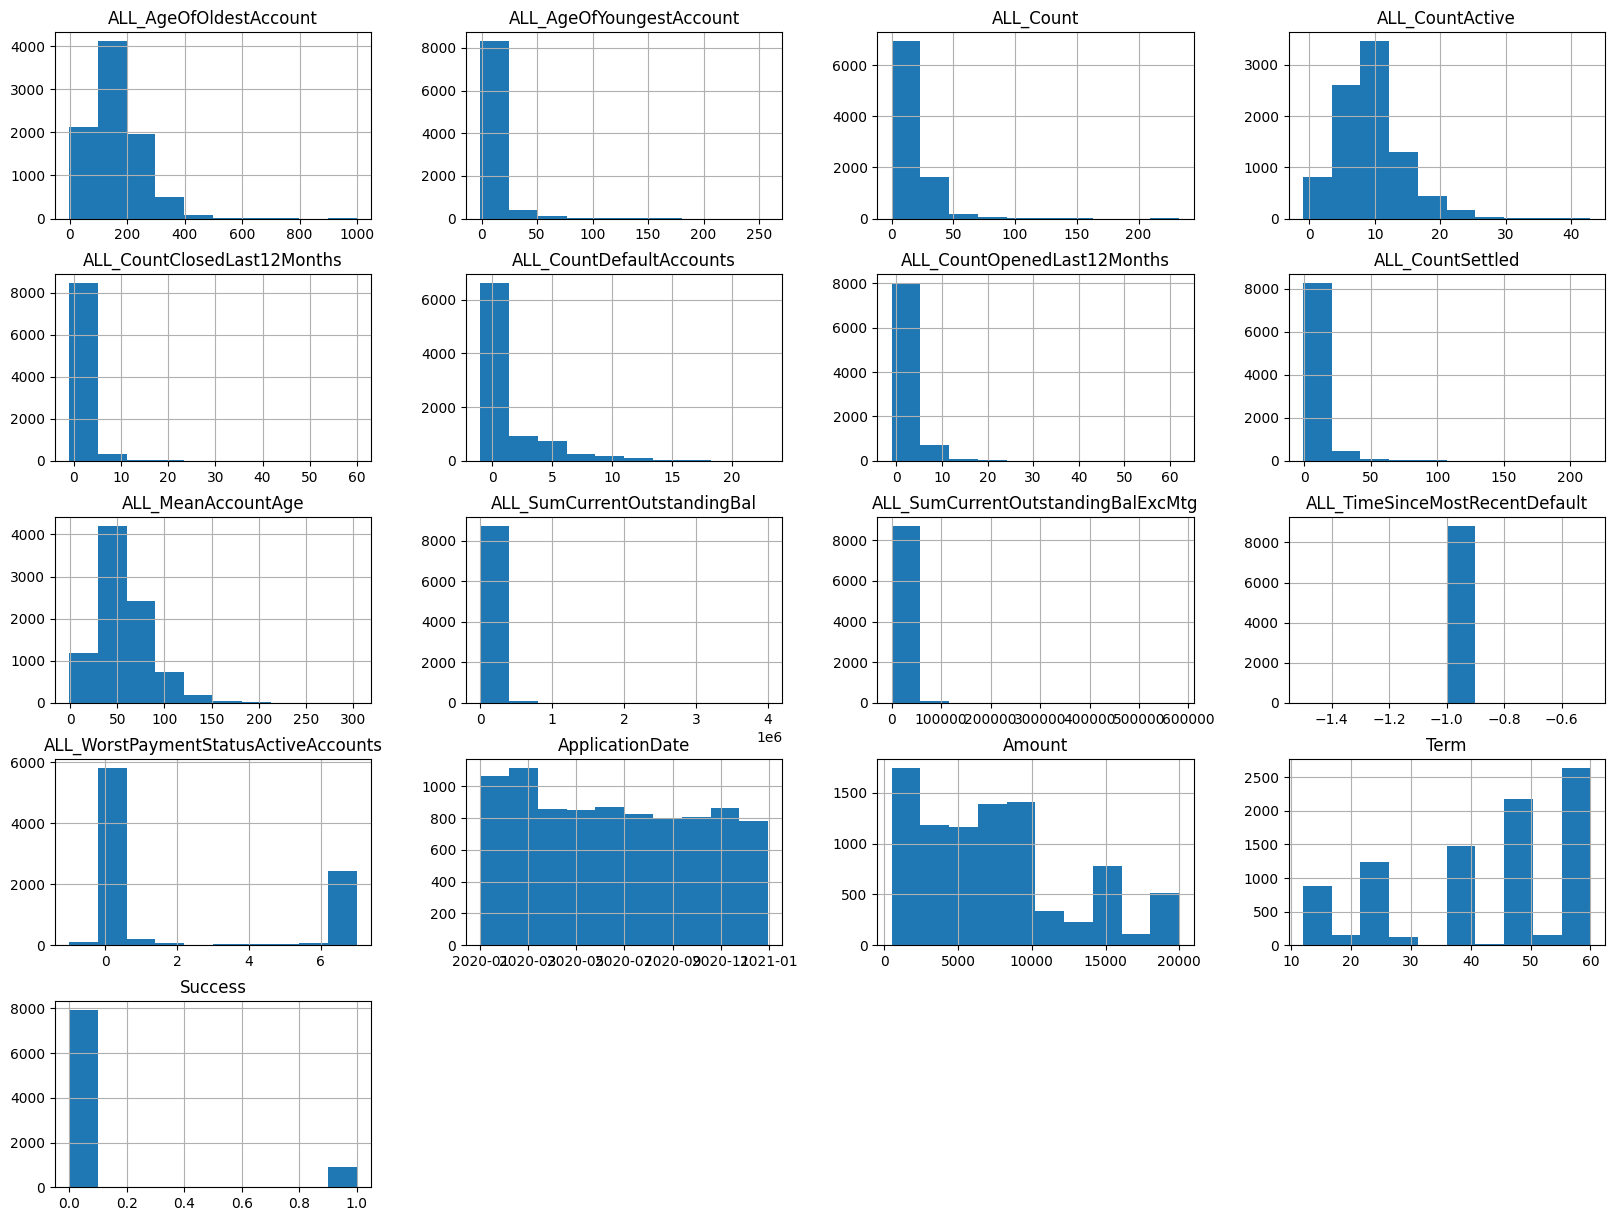

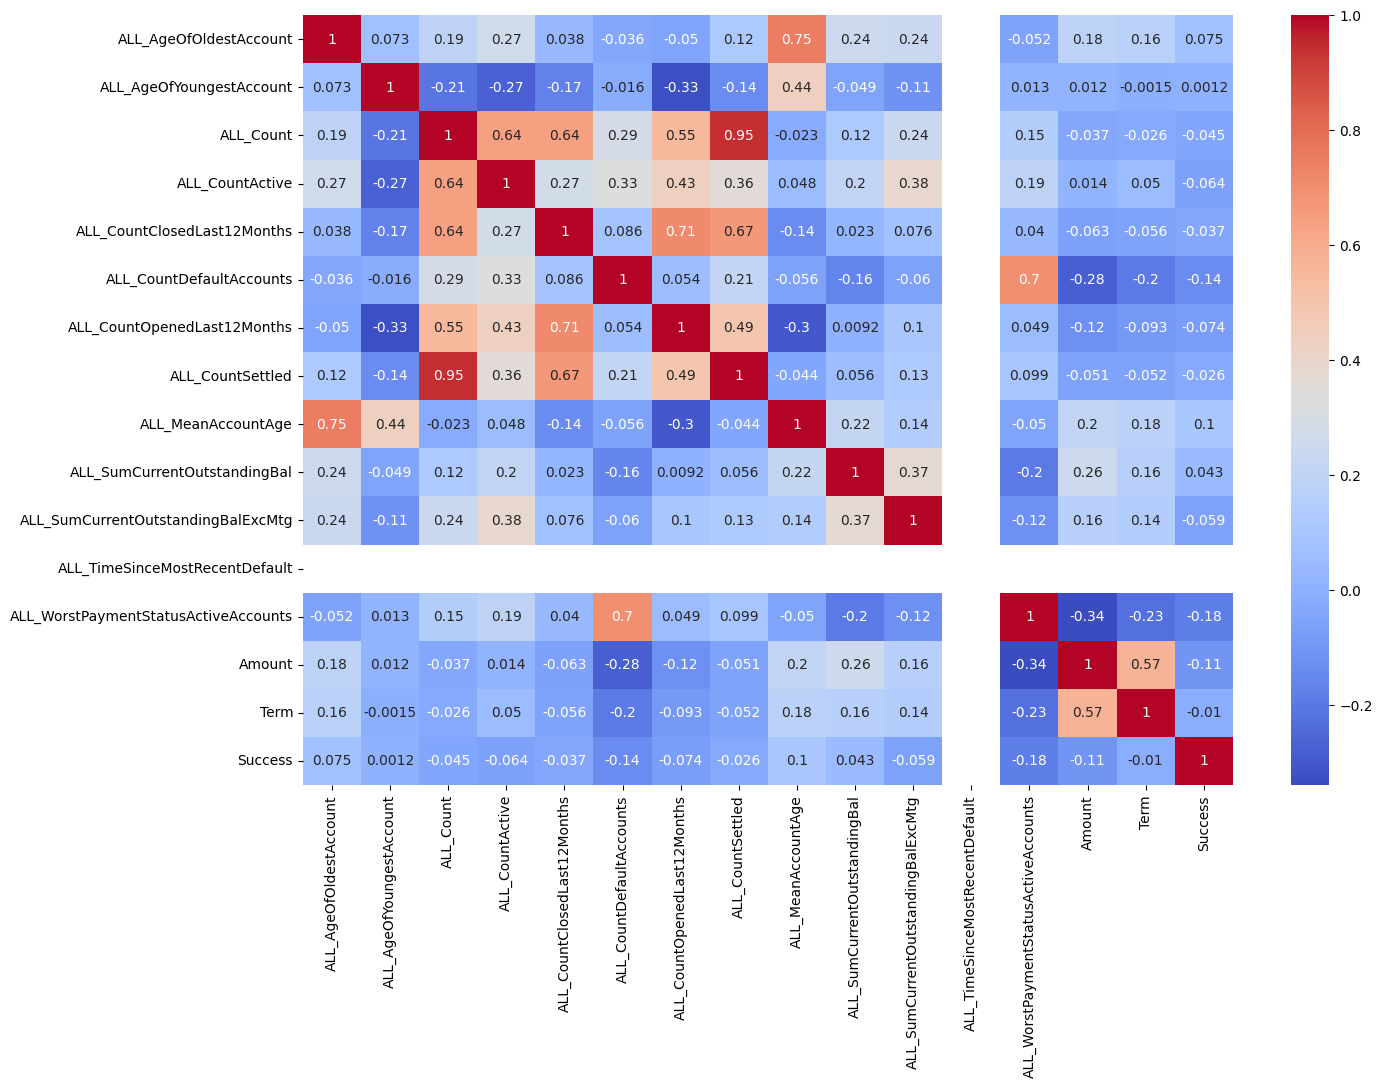

In [44]:
merged_data.hist(figsize=(20, 15))
plt.show()

# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(merged_data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

### Building a model

In [45]:
model_data = merged_data.drop( columns=[ 'ApplicationDate' ], axis=1 )
model_data = pd.get_dummies( model_data, columns=[ 'LoanPurpose', 'EmploymentType' ] )

X = model_data.drop( 'Success', axis=1 )
y = model_data[ 'Success' ]

print(f'X:\n{X}\n\ny:\n{y}')

X:
      ALL_AgeOfOldestAccount  ALL_AgeOfYoungestAccount  ALL_Count  \
0                        227                        12         14   
1                         49                        10          7   
2                        134                         0         12   
3                        227                         2         39   
4                        132                         2         99   
...                      ...                       ...        ...   
8842                     399                        13         23   
8843                     217                        23          5   
8844                       3                         1          2   
8845                     178                        15         23   
8846                      81                         3         12   

      ALL_CountActive  ALL_CountClosedLast12Months  ALL_CountDefaultAccounts  \
0                  11                            0                         3   
1       

In [46]:
df_majority = model_data[model_data['Success'] == 0]
df_minority = model_data[model_data['Success'] == 1]

df_majority_undersampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [47]:
print(f'training set shape:\n{X_train.shape}\n{y_train.shape}')
print(f'testing set shape:\n{X_test.shape}\n{y_test.shape}')

training set shape:
(7077, 2463)
(7077,)
testing set shape:
(1770, 2463)
(1770,)


In [48]:
model = RandomForestClassifier( random_state=42, verbose=1 )
history = model.fit( X_train, y_train )

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s


### Model testing, evaluation and hyperparameter tuning

In [49]:
y_pred = model.predict( X_test )
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print( f'ROC-AUC score: {roc_auc_score(y_test, y_proba)}' )

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1586
           1       0.43      0.02      0.03       184

    accuracy                           0.90      1770
   macro avg       0.66      0.51      0.49      1770
weighted avg       0.85      0.90      0.85      1770

ROC-AUC score: 0.8163105159274083


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [50]:
cv_scores = cross_val_score( model, X_train, y_train, cv=5, scoring='roc_auc' )
print( f'Mean ROC-AUC: { cv_scores.mean() }' )

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s


Mean ROC-AUC: 0.8415327557863828


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


<Axes: >

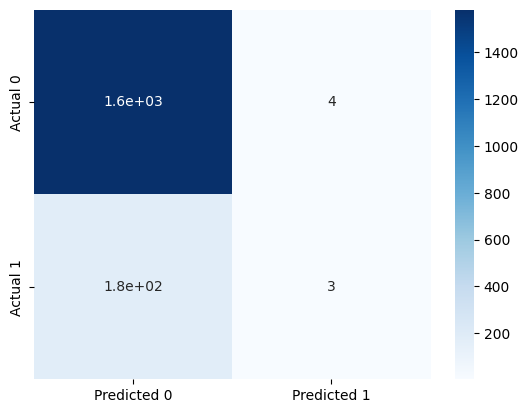

In [51]:
cm = confusion_matrix( y_test, y_pred )
sns.heatmap( cm, annot=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], cmap='Blues' )

In [52]:
param_grid = {
    'n_estimators' : [100, 200, 500],
    'max_depth' : [ 3, 5, 7, None ],
    'min_samples_split' : [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, verbose=1), param_grid, cv=5, scoring="roc_auc")
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42, verbose=1),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='roc_auc')

In [53]:
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
Best ROC-AUC Score: 0.854263466538202
